## Final Project: Unveiling Product Preferences Across Age Groups - A Data-Driven Approach to Targeted Marketing


### INTRODUCTION:

### In the dynamic realm of consumer goods, understanding the unique preferences of diverse age groups is crucial for achieving marketing success. By analyzing sales data, we aim to uncover the top-selling products within three distinct age groups: Generation Z, Millennials, and Gen X. This comprehensive analysis will provide valuable insights into the purchasing habits and preferences of each demographic. Armed with this knowledge, we will develop targeted marketing strategies to effectively promote few of the top 10 products within their respective age groups. Our approach will encompass tailoring marketing messages, channels, and promotions to resonate with the specific preferences and interests of each demographic. Through this data-driven approach, we are confident in achieving enhanced brand awareness, increased customer engagement, and ultimately, a surge in product sales across all three age groups.

## 1. Importing required packages

In [32]:
from completejourney_py import get_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


###
* completejourney_py - working on this dataset  
* pandas - Data manipulation and analysis library for handling structured data.
* matplotlib - Plotting library for creating visualizations from data.
* numpy - Fundamental package for scientific computing with support for large arrays and mathematical functions.







## 2. importing required datasets

In [29]:
cj_data = get_data()


transactions = cj_data['transactions']
products = cj_data['products']
demographics = cj_data['demographics']


## 3. Preliminary Observation: Unveiling the Largest Customer Segment

In [28]:
merged_df = transactions.merge(demographics, how='left', on='household_id')
age_value = transactions.merge(demographics, how='left', on='household_id').groupby('age', as_index=False).agg({'sales_value': sum}).sort_values(by='sales_value', ascending=False)
age_value

,age,sales_value
3,45-54,971822.19
2,35-44,724357.40
1,25-34,453372.46
5,65+,176600.84
4,55-64,173153.70
0,19-24,125673.05


In [31]:
age_customerbase = demographics.groupby('age', as_index=False).agg({'household_id': 'count' }).sort_values(by='age', ascending=False)

age_customerbase = age_customerbase.rename(columns={'household_id': 'number of customers'})
age_customerbase

,age,number of customers
5,65+,72
4,55-64,59
3,45-54,288
2,35-44,194
1,25-34,142
0,19-24,46


In [4]:

age_value['age'] = age_value['age'].replace({'19-24': '19-34', '25-34': '19-34', '35-44': '35-54', '45-54': '35-54', '55-64': '55+', '65+': '55+'}) 
result_df2 = age_value.groupby('age').agg({'sales_value': 'sum'}).reset_index() 
result_df2


,age,sales_value
0,19-34,579045.51
1,35-54,1696179.59
2,55+,349754.54


In [13]:
age_customerbase['age'] = age_customerbase['age'].replace({'19-24': '19-34', '25-34': '19-34', '35-44': '35-54', '45-54': '35-54', '55-64': '55+', '65+': '55+'}) 
result_df = age_customerbase.groupby('age').agg({'number of customers': 'sum'}).reset_index() 
result_df

,age,number of customers
0,19-34,188
1,35-54,482
2,55+,131


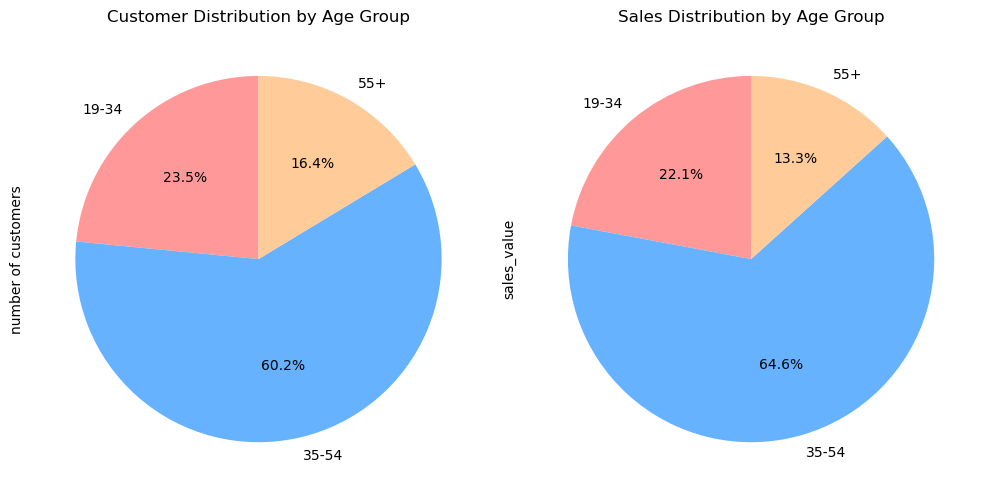

In [14]:


custom_colors = ['#FF9999', '#66B2FF', '#FFCC99', '#c2c2f0']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))


result_df.plot.pie(ax=axes[0], y='number of customers', labels=result_df['age'], autopct='%1.1f%%', startangle=90, legend=False, colors=custom_colors)
axes[0].set_title('Customer Distribution by Age Group')


result_df2.plot.pie(ax=axes[1], y='sales_value', labels=result_df2['age'], autopct='%1.1f%%', startangle=90, legend=False, colors=custom_colors)
axes[1].set_title('Sales Distribution by Age Group')

plt.tight_layout()


plt.show()

### Our preliminary data analysis reveals that customers from age cagegory 35-54 represent the largest customer group, accounting for 64.6% of total sales. This is followed by  ustomers from age cagegory 19-34 at 22.1% and 55+ age category customers at 13.3%. This initial insight provides a valuable starting point for our targeted marketing efforts, as we can focus on tailoring our strategies to the preferences and interests of the most prominent demographic.

## 4. Consumption Profile for all three age groups

## a. For age-category 19-34

In [35]:
age1_products_sales = merged_df[(merged_df['age'] == '19-24') | (age_value['age'] == '25-34')].merge(products, how='left', on='product_id').groupby('product_category', as_index=False).agg({'sales_value': sum}).sort_values(by='sales_value', ascending=False)
age1_products_sales=age1_products_sales[age1_products_sales['product_category']!= 'COUPON/MISC ITEMS'].head(10)
age1_products_sales

age1_products_quantity = merged_df[(merged_df['age'] == '19-24') | (merged_df['age'] == '25-34')].merge(products, how='left', on='product_id').groupby('product_category', as_index=False).agg({'quantity': sum}).sort_values(by='quantity', ascending=False)
age1_products_quantity = age1_products_quantity[age1_products_quantity['product_category'].isin(age1_products_sales['product_category'])]
age1_products_quantity

age1_merged = pd.merge(age1_products_sales, age1_products_quantity, on='product_category')
age1_merged

,product_category,sales_value,quantity
0,SOFT DRINKS,6572.03,10454
1,BEEF,4398.12,4155
2,FROZEN PIZZA,3698.72,5976
3,CHEESE,3672.08,7806
4,FRZN MEAT/MEAT DINNERS,3280.73,5881
5,BAG SNACKS,2832.31,5925
6,FLUID MILK PRODUCTS,2670.77,8089
7,BEERS/ALES,2542.86,1648
8,BAKED BREAD/BUNS/ROLLS,2344.84,7232
9,CIGARETTES,2117.68,1275


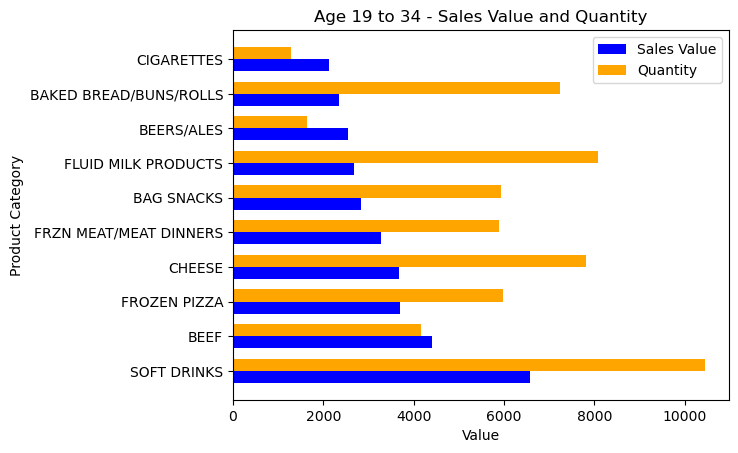

In [33]:

fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Set the positions for the bars
positions = np.arange(len(age1_merged['product_category']))

# Bar for sales_value
ax.barh(positions - bar_width/2, age1_merged['sales_value'], color='blue', label='Sales Value', height=bar_width)

# Bar for quantity
ax.barh(positions + bar_width/2, age1_merged['quantity'], color='orange', label='Quantity', height=bar_width)

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Product Category')
ax.set_title('Age 19 to 34 - Sales Value and Quantity')

# Add legend
ax.legend()

# Set y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(age1_merged['product_category'])

# Display the plot
plt.show()

### Here we see the top ten items that are purchased by the customers from age category 19 -34. The most popular item is soft drinks with sales value of 6572.03 and the least popular item is CIGARETTES  with sales value of 2117.68



## b. for age-category 35-54

In [17]:
age2_products_sales = merged_df[(merged_df['age'] == '35-44') | (merged_df['age'] == '45-54')].merge(products, how='left', on='product_id').groupby('product_category', as_index=False).agg({'sales_value': sum}).sort_values(by='sales_value', ascending=False)
age2_products_sales=age2_products_sales[age2_products_sales['product_category']!= 'COUPON/MISC ITEMS'].head(10)
age2_products_sales
age2_products_quantity = merged_df[(merged_df['age'] == '35-44') | (merged_df['age'] == '45-54')].merge(products, how='left', on='product_id').groupby('product_category', as_index=False).agg({'quantity': sum}).sort_values(by='quantity', ascending=False)
age2_products_quantity = age2_products_quantity[age2_products_quantity['product_category'].isin(age2_products_sales['product_category'])]
age2_products_quantity
age2_merged = pd.merge(age2_products_sales, age2_products_quantity, on='product_category')
age2_merged

,product_category,sales_value,quantity
0,SOFT DRINKS,66137.93,31865
1,BEEF,63609.17,12921
2,FLUID MILK PRODUCTS,42734.49,24590
3,CHEESE,37970.94,19466
4,FRZN MEAT/MEAT DINNERS,34784.54,16625
5,BAG SNACKS,30228.50,16705
6,BAKED BREAD/BUNS/ROLLS,29041.91,19065
7,BEERS/ALES,27261.44,3451
8,FROZEN PIZZA,25733.78,11043
9,DELI MEATS,23429.77,5545


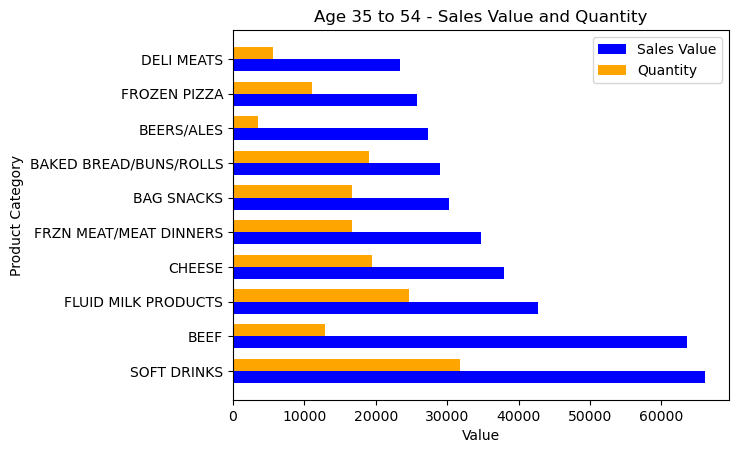

In [20]:
import numpy as np
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Set the positions for the bars
positions = np.arange(len(age2_merged['product_category']))

# Bar for sales_value
ax.barh(positions - bar_width/2, age2_merged['sales_value'], color='blue', label='Sales Value', height=bar_width)

# Bar for quantity
ax.barh(positions + bar_width/2, age2_merged['quantity'], color='orange', label='Quantity', height=bar_width)

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Product Category')
ax.set_title('Age 35 to 54 - Sales Value and Quantity')

# Add legend
ax.legend()

# Set y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(age2_merged['product_category'])

# Display the plot
plt.show()

### Here we see the top ten items that are purchased by the customers from age category 35-54. The most popular item here is also soft drinks with sales value of 66137.93 and the least popular item is deli meats with sales value of 23429.77.

## c. for age-category 55+

In [21]:
age3_products_sales = merged_df[(merged_df['age'] == '55-64') | (merged_df['age'] == '65+')].merge(products, how='left', on='product_id').groupby('product_category', as_index=False).agg({'sales_value': sum}).sort_values(by='sales_value', ascending=False)
age3_products_sales=age3_products_sales[age3_products_sales['product_category']!= 'COUPON/MISC ITEMS'].head(10)
age3_products_sales
age3_products_quantity = merged_df[(merged_df['age'] == '55-64') | (merged_df['age'] == '65+')].merge(products, how='left', on='product_id').groupby('product_category', as_index=False).agg({'quantity': sum}).sort_values(by='quantity', ascending=False)
age3_products_quantity = age3_products_quantity[age3_products_quantity['product_category'].isin(age3_products_sales['product_category'])]
age3_products_quantity
age3_merged = pd.merge(age3_products_sales, age3_products_quantity, on='product_category')
age3_merged

,product_category,sales_value,quantity
0,BEEF,13146.40,2902
1,SOFT DRINKS,11924.19,5450
2,FLUID MILK PRODUCTS,8054.46,4949
3,FRZN MEAT/MEAT DINNERS,6827.21,3317
4,BAKED BREAD/BUNS/ROLLS,6671.96,4403
5,CHEESE,6607.67,3377
6,BEERS/ALES,4925.53,565
7,BAG SNACKS,4885.51,2701
8,DELI MEATS,4831.91,1430
9,SOUP,4802.75,4284


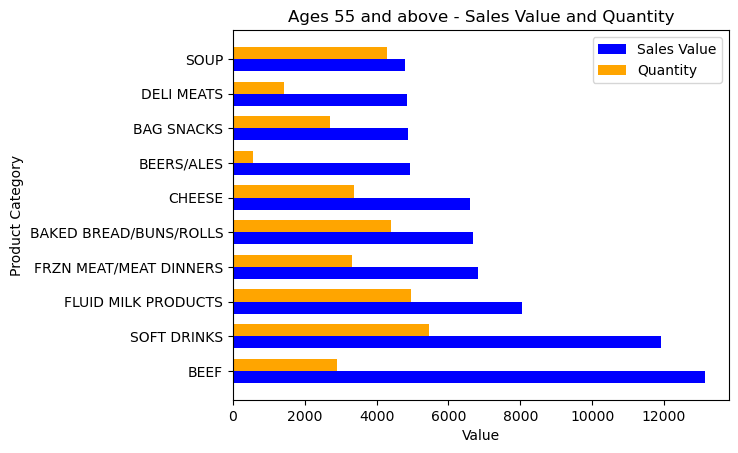

In [19]:
import numpy as np
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.35

# Set the positions for the bars
positions = np.arange(len(age3_merged['product_category']))

# Bar for sales_value
ax.barh(positions - bar_width/2, age3_merged['sales_value'], color='blue', label='Sales Value', height=bar_width)

# Bar for quantity
ax.barh(positions + bar_width/2, age3_merged['quantity'], color='orange', label='Quantity', height=bar_width)

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Product Category')
ax.set_title('Ages 55 and above - Sales Value and Quantity')

# Add legend
ax.legend()

# Set y-axis ticks and labels
ax.set_yticks(positions)
ax.set_yticklabels(age3_merged['product_category'])

# Display the plot
plt.show()

### Here we see the top ten items that are purchased by the customers from age category 55+. The most popular item here is also beef with sales value of 13146.40 and the least popular item is soup with sales value of 4802.75.

# 5. Summary

### Problem Statement and Methodology
This data-driven analysis aims to uncover specific product preferences across age groups, providing insights crucial for targeted marketing strategies. By examining sales data, we seek to identify trends and behaviors, enabling businesses to optimize product offerings and tailor marketing campaigns for maximum resonance with each demographic. This approach aims to enhance customer engagement, ultimately driving increased revenue and market relevance.

### Observations And Recommendations
#### For age-category 19-34
##### Observations:
Our data analysis strongly indicates that frozen meat, baked snacks, and frozen pizza possess significant untapped potential within age group 19-34. Leveraging strategic marketing initiatives and tailoring promotional activities to the preferences of this demographic can unlock substantial growth opportunities for these products.

##### Recommendations:
**Targeted Promotions**: Create special promotions and discounts specifically for these products, perhaps tied to loyalty programs or bulk purchases.

**Cross-Selling Strategies**: Implement cross-selling strategies by placing these products strategically alongside complementary items. For example, display frozen meat near fresh vegetables or frozen pizza near pasta and sauces.

#### For age-category 35-54
##### Observations:
Among the top-selling items, Soft Drinks lead in both sales value and quantity, suggesting high consumer demand. Beef and Fluid Milk Products follow closely, reflecting a mix of preferences for both protein and dairy. Frozen Meat/Dinners and Bag Snacks also demonstrate notable sales, emphasizing convenience and snacking trends.

##### Recommendations:
Given the popularity of Bag Snacks, consider expanding the variety to cater to diverse tastes within the 35-54 age group. Incorporating healthier and innovative snack options might appeal to this demographic.

With Soft Drinks leading in sales, introducing and promoting healthier beverage alternatives such as low-sugar or functional drinks could attract health-conscious consumers aged 35-54

Since Deli Meats are among the top-selling items, expanding and promoting premium or specialty deli meat options may resonate well with this age group, emphasizing quality and variety.

#### For age-category 55+
##### Observations:
The customer base of this age group was the least. The Beef sales comprised of a major portion of the top 10 products. Soup which wasn’t part of the top 10 for the previous age groups was the 10th most popular product in this age group.

##### Recommendations:
Regork should try to increase the number of customers from this age group by introducing promotions and coupons specifically aimed towards senior citizens.

Regork can promote the sales of soup as it has potential as visible from the chart and is a healthy option for the senior members.

# Conclusion and Limitations
In conclusion, it's essential to note that the dataset utilized for this analysis is from 2017, and detailed campaign data, particularly location-wise, was unavailable. Despite these limitations, the insights derived from the provided dataset offer valuable directions for potential impact on sales.Adaptation to current market dynamics and the incorporation of localized campaign insights would further enhance the efficacy of future marketing initiatives.